In [1]:
import sys
sys.path.insert(0, '..')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import dataframe_manip as hp
import pytz
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime as dt

In [2]:
data = hp.csv_to_timeseries_df(filepath='../wifi_data_until_20190204.csv', timezone=pytz.timezone('US/Pacific'))

In [3]:
temp = hp.get_daily_average(data, 'CLARK')

In [4]:
for i, row in temp.iterrows():
    temp.at[i,'ds'] = dt.strptime(temp.at[i, 'ds'], '%Y-%m-%d').date()
    temp.at[i, 'ds'] = temp.at[i, 'ds'].toordinal()

In [5]:
x = temp['ds']
x = x[:, None]

y = temp['y']

In [6]:
forest = RandomForestRegressor(200)
forest.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [7]:
xfit = np.linspace(736893, 737094, 202)
yfit = forest.predict(xfit[:, None])

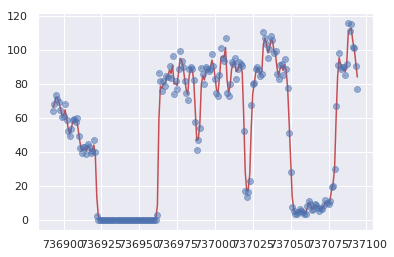

In [8]:
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');

In [9]:
print(temp)

         ds           y
0    736893   64.200000
1    736894   68.152778
2    736895   73.642361
3    736896   71.034722
4    736897   69.347222
5    736898   64.368056
6    736899   60.319444
7    736900   60.756944
8    736901   68.211806
9    736902   58.637631
10   736903   52.350694
11   736904   49.284722
12   736905   53.479167
13   736906   58.902098
14   736907   59.378472
15   736908   57.267361
16   736909   59.631944
17   736910   49.454861
18   736911   42.121528
19   736912   39.201389
20   736913   42.708333
21   736914   43.079861
22   736915   38.961806
23   736916   44.597222
24   736917   42.697917
25   736918   39.229167
26   736919   40.225694
27   736920   46.972222
28   736921   39.954861
29   736922    2.465278
..      ...         ...
172  737065    6.274306
173  737066    9.069444
174  737067    8.659722
175  737068    7.135417
176  737069    5.479167
177  737070    7.059028
178  737071    6.364583
179  737072    8.541667
180  737073   11.510417
181  737074   10